# Pipelines

In [2]:
# Будем работать с датасетом https://www.kaggle.com/datasets/datascientistanna/customers-dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Customers.csv")

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Предсказывать будем Spending Score (1-100)

Проведём небольшой EDA:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [20]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


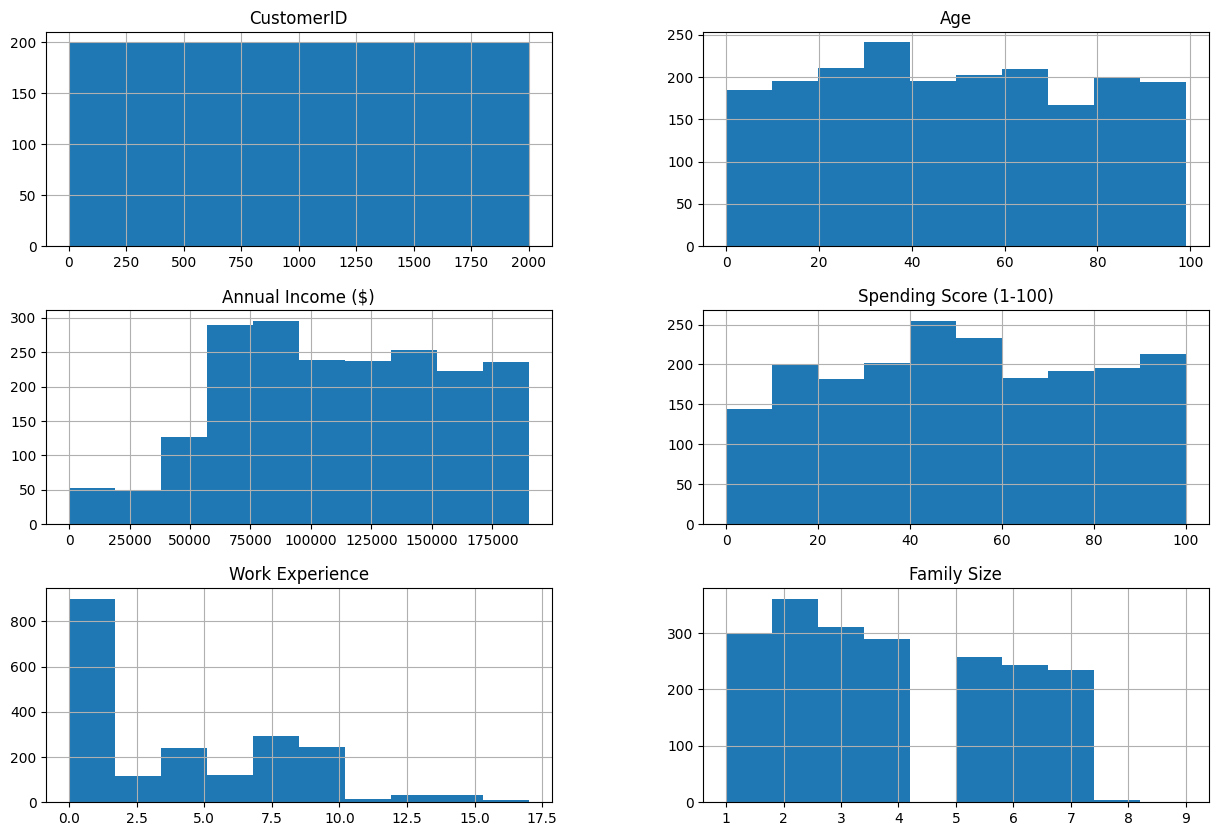

In [22]:
df.hist(figsize=(15, 10))
plt.show();

<ipython-input-26-ae0b1fbe9dcd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


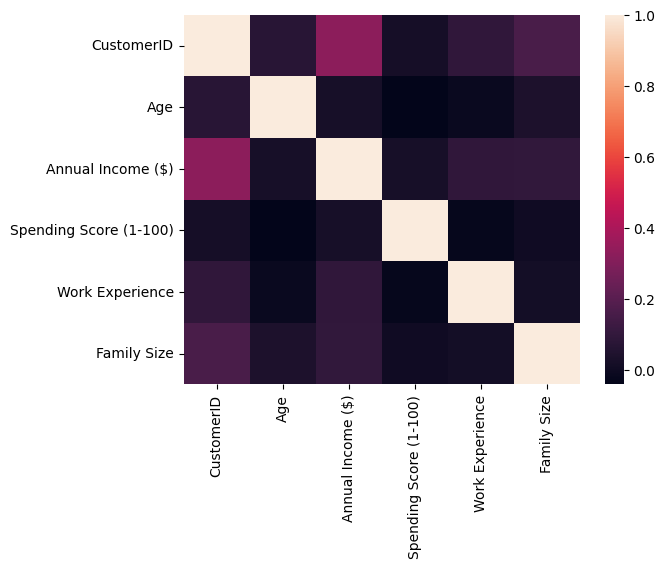

In [26]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show();

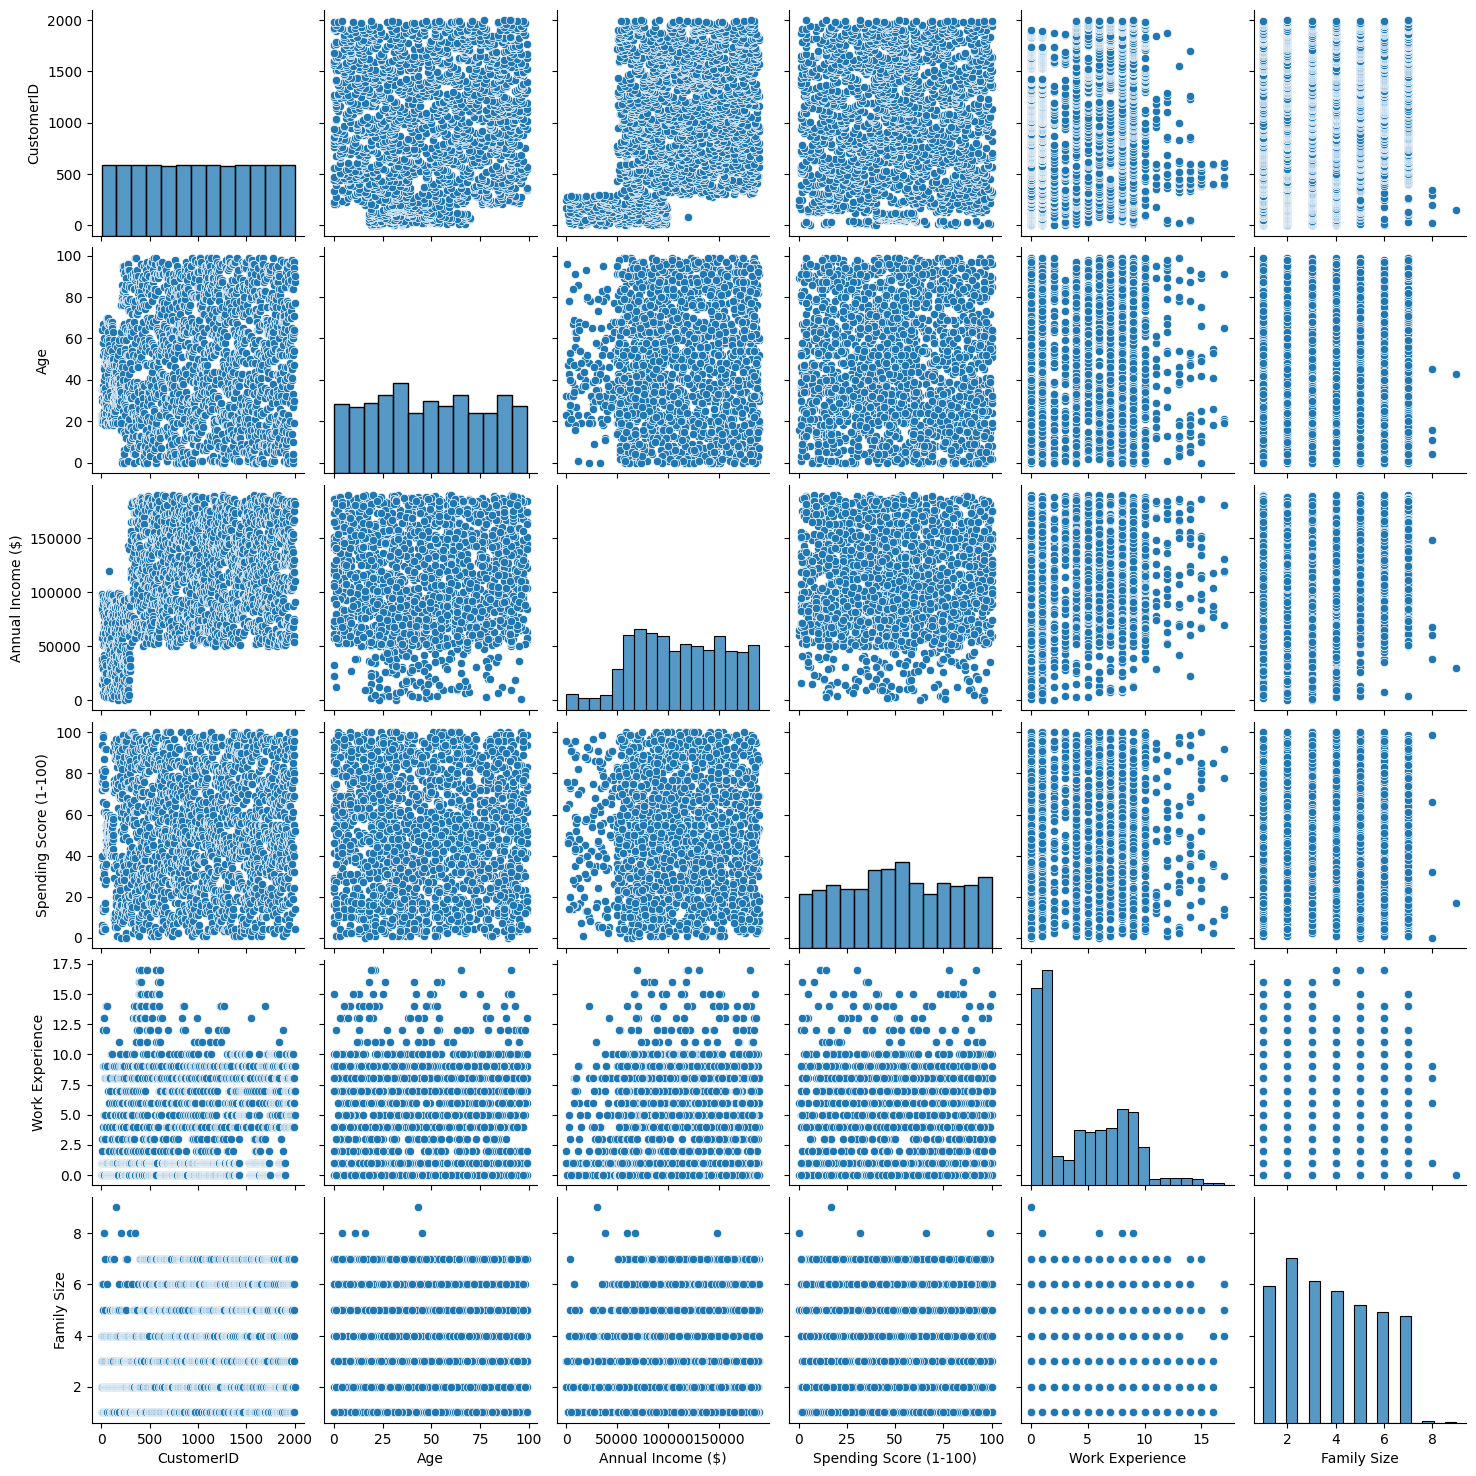

In [28]:
sns.pairplot(df)

In [29]:
# TODO: потыкать еще EDA

# Разобьем на группы и подготовим признаки

In [32]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(df.drop('Spending Score (1-100)', axis = 1),
                                                    df['Spending Score (1-100)'], test_size=0.33, random_state=42)

In [47]:
X_train.head()

,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size
81,82,Male,38,61000,Healthcare,6,3
915,916,Male,91,62808,Engineer,0,4
1018,1019,Female,25,106669,Lawyer,1,7
380,381,Male,8,175407,Artist,5,1
1029,1030,Male,38,101846,Doctor,3,2


In [104]:
numerical_features = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']  # Численные переменные

# Бинарные признаки
categorical_features = [
    'Gender', 'Profession'
]

target = ['Spending Score (1-100)']

all_features = numerical_features + categorical_features
len(all_features)

6

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_train_scaled[:10]



array([[-0.36826606, -1.08675711,  0.45265122, -0.36052687],
       [ 1.49882815, -1.04701901, -1.04439354,  0.14166232],
       [-0.82623257, -0.08299654, -0.79488608,  1.64822991],
       [-1.42511185,  1.42779838,  0.20314376, -1.36490526],
       [-0.36826606, -0.18900143, -0.29587116, -0.86271606],
       [-0.43872245, -1.05121701,  1.20117361, -0.36052687],
       [-0.96714534, -1.89998141, -0.79488608, -0.36052687],
       [-1.70693739,  0.34319893, -0.79488608, -0.36052687],
       [ 1.04086165, -0.25326813, -0.54537862, -0.36052687],
       [-0.47395064, -1.74612816, -0.79488608, -0.36052687]])

In [83]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_ohe = ohe.fit_transform(X_train[category_features])
X_train_ohe[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [84]:
data_train_tramsformed = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_features),
                                    pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out()),
                                   ], axis=1)
data_train_tramsformed.head()

,Age,Annual Income ($),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_nan
0,-0.368266,-1.086757,0.452651,-0.360527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.498828,-1.047019,-1.044394,0.141662,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.826233,-0.082997,-0.794886,1.648230,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.425112,1.427798,0.203144,-1.364905,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.368266,-0.189001,-0.295871,-0.862716,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
X_test_scaled = scaler.transform(X_test[numerical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

In [88]:
data_test_tramsformed = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_features),
                                    pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out()),
                                   ], axis=1)
data_train_tramsformed.head()

,Age,Annual Income ($),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_nan
0,-0.368266,-1.086757,0.452651,-0.360527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.498828,-1.047019,-1.044394,0.141662,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.826233,-0.082997,-0.794886,1.648230,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.425112,1.427798,0.203144,-1.364905,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.368266,-0.189001,-0.295871,-0.862716,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Построим бейзлайн-модель

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [90]:
model = LinearRegression()
model.fit(data_train_tramsformed, y_train)

LinearRegression()

In [91]:
preds_train = model.predict(data_train_tramsformed)
preds_test = model.predict(data_test_tramsformed)

print(f'On test: MSE: {sqrt(mean_squared_error(y_train, preds_train))}, MAE: {mean_absolute_error(y_train, preds_train)}')
print(f'On test: MSE: {sqrt(mean_squared_error(y_test, preds_test))}, MAE: {mean_absolute_error(y_test, preds_test)}')

On test: MSE: 27.68010306984422, MAE: 23.498172143076275
On test: MSE: 28.152403902784165, MAE: 23.872528589253854


In [92]:
#TODO: обучите деревья, леса и бустинги на этих данных

А если хотим что-то поменять?
Например попробовать сделать другой пре-процессинг для категорийных признаков или изменить параметры модели. Всё перепрогонять? Тут на помощь приходят Pipelines

# Pipelines

In [93]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [113]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("fs", SelectKBest(score_func=f_classif, k="all")),
])

#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[
    # ("imputer", SimpleImputer()),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features),
])

# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

regression_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regression", LinearRegression())])

regression_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Annual '
                                                                    'Income '
                                                                    '($)',
                                                                    'Work '
                                                                    'Experience',
                                                                    'Family '
                                                                    'Size']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Gender',
                                                                    'Profession'])]))])),
                ('regression', LinearRegression())])

In [114]:
import sklearn
sklearn.set_config(display='diagram') #Подключим визуал

regression_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Annual '
                                                                    'Income '
                                                                    '($)',
                                                                    'Work '
                                                                    'Experience',
                                                                    'Family '
                                                                    'Size']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Gender',
                                                                    'Profession'])]))])),
                ('regression', LinearRegression())])

In [115]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df[all_features + target], test_size=0.2)
print(data_train.shape, data_test.shape)

(1600, 7) (400, 7)


In [118]:
regression_pipeline.fit(data_train[all_features], data_train[target])

preds_train = regression_pipeline.predict(data_train[all_features])
preds_test = regression_pipeline.predict(data_test[all_features])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
print(f'On test: MSE: {sqrt(mean_squared_error(data_train[target], preds_train))}, MAE: {mean_absolute_error(data_train[target], preds_train)}')
print(f'On test: MSE: {sqrt(mean_squared_error(data_test[target], preds_test))}, MAE: {mean_absolute_error(data_test[target], preds_test)}')

On test: MSE: 27.581737611536248, MAE: 23.337940529360313
On test: MSE: 28.82489734045603, MAE: 24.672949802061773
